# Candidate Test 2022 Analysis Part 1

This exercise focuses on the candidate tests from two television networks: DR and TV2. Data from both tests have been given on a scale of five responses (-2, -1, 0, 1, 2).

---

There are 6 datasets included in this exercise:

- `alldata.xlsx`: Contains responses from both TV stations.
- `drdata.xlsx`: Contains responses from DR.
- `drq.xlsx`: Contains questions from DR.
- `tv2data.xlsx`: Contains responses from TV2.
- `tv2q.xlsx`: Contains questions from TV2.
- `electeddata.xlsx`: Contains responses from both TV stations for candidates who were elected to the parliament. Note that 9 members are missing; 7 of them didn't take any of the tests. Additionally, some notable figures like Mette F. and Lars Løkke did not participate in any of the tests.

---

It's entirely up to you how you approach this data, but at a *minimum*, your analysis should include:
- Age of the candidates grouped by parties.
- An overview of the most "confident" candidates, i.e., those with the highest proportion of "strongly agree" or "strongly disagree" responses.
- Differences in responses between candidates, both inter-party and intra-party, along with an explanation of which parties have the most internal disagreements.
- Classification models to predict candidates' party affiliations. Investigate if there are any candidates who seem to be in the "wrong" party based on their political landscape positions. You must use the following three algorithms: **Decision Tree, Random Forrest, and Gradient Boosted Tree**, and **two other** classification algorithms of your choice.

---

The following parties are represented:

| Party letter | Party name | Party name (English) | Political position |
| :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left |
| V | Venstre | Danish Liberal Party | Centre-right |
| M | Moderaterne | Moderates | Centre-right |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing |
| D | Danmarksdemokraterne | Denmark Democrats | Right-wing |
| I | Liberal Alliance | Liberal Alliance | Right-wing |
| C | Konservative | Conservative People's Party | Right-wing |
| Æ | Enhedslisten | Red-Green Alliance | Far-left |
| B | Radikale Venstre | Social Liberal Party | Centre-left |
| D | Nye Borgerlige | New Right | Far-right |
| Z | Alternativet | The Alternative | Centre-left |
| O | Dansk Folkeparti | Danish People's Party | Far-right |
| G | Frie Grønne | Free Greens | Centre-left |
| K | Kristendemokraterne | Christian Democrats | Centre-right |

Below you can see the results and the colors chosen to represent the parties. Use these colors in your analysis above.

![Alt text](image-1.png)


Others have undertaken similar analyses. You can draw inspiration from the following (use Google tranlsate if your Danish is rusty):

- [Analysis of where individual candidates stand relative to each other and their parties](https://v2022.dumdata.dk/)
- [Candidate Test 2022 – A deep dive into the data](https://kwedel.github.io/kandidattest2022/)
- [The Political Landscape 2019](https://kwedel.github.io/kandidattest2019/)



In [18]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

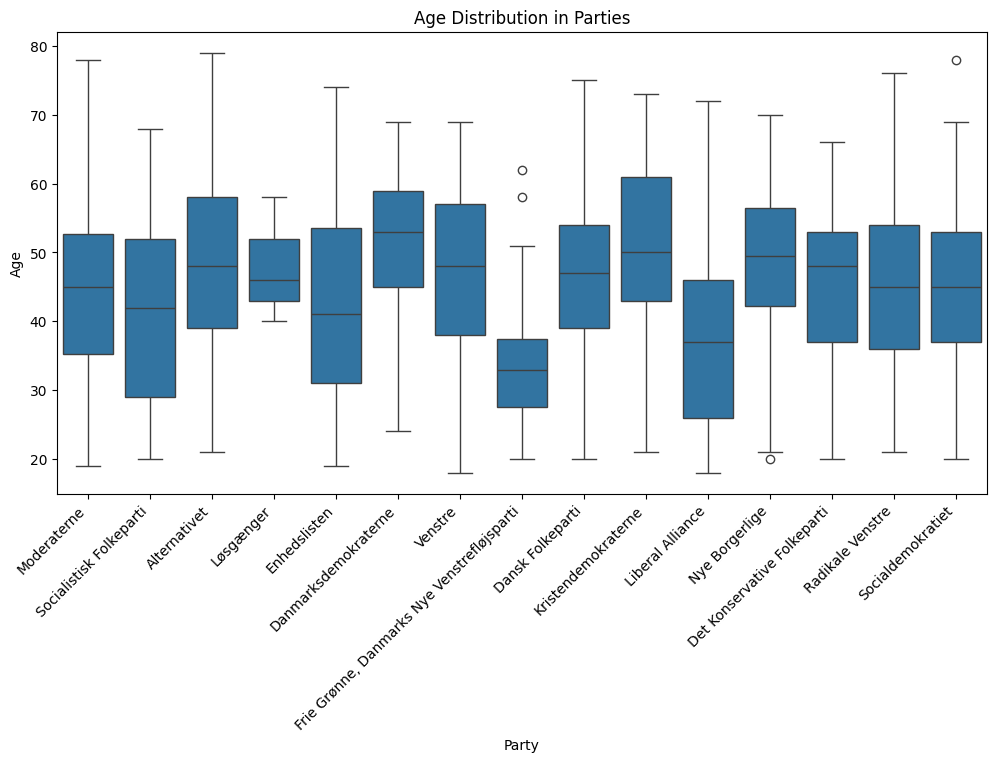

In [19]:
#Age of the candidates grouped by parties.

# loading the data
data = pd.read_excel('alldata.xlsx')

data_filtered = data.dropna()
data_filtered.head()

# taking only relevant columns
data_limited = data_filtered[["parti",
                     "alder",]]


# Filtering out rows where 'alder' is 0
data_filtered = data_filtered.loc[data_filtered['alder'] != 0]

plt.figure(figsize=(12, 6))
sns.boxplot(x='parti', y='alder', data=data_filtered)
plt.xticks(rotation=45, ha='right')
plt.title('Age Distribution in Parties')
plt.xlabel('Party')
plt.ylabel('Age')
plt.show()


In [20]:
# An overview of the most "confident" candidates, i.e., those with the highest proportion of "strongly agree" or "strongly disagree" responses.

# taking relevant columns
data_limited = data_filtered[[
                    "navn",
                    "530",
                    "531",
                    "533",
                    "534",
                    "535",
                    "537",
                    "538",
                    "540",
                    "541",
                    "543",
                    "544",
                    "545",
                    "546",
                    "547",
                    "548",
                    "550",
                    "551",
                    "552",
                    "553",
                    "555",
                    "556",
                    "557",
                    "559",
                    "561",
                     "1a",
                     "1b",
                     "2a",
                     "2b",
                     "3a",
                     "3b",
                     "4a",
                     "4b",
                     "5a",
                     "5b",
                     "6a",
                     "6b",
                     "7a",
                     "7b",
                     "8a",
                     "8b",
                     "9a",
                     "9b",
                     "10a",
                     "10b",
                     "11a",
                     "11b",
                     "12a",
                     "12b",]]

data_limited.head()

,navn,530,531,533,534,535,537,538,540,541,...,8a,8b,9a,9b,10a,10b,11a,11b,12a,12b
0,Lars Philipsen Prahm,-1,-2,1,-2,2,1,-2,1,1,...,1,0,2,0,1,-2,-2,1,1,1
1,Karsten Hønge,2,2,-1,-2,-1,-2,1,-2,2,...,0,0,-2,0,-1,2,1,-2,0,0
2,Martin Kelleher-Petersen,2,1,-2,-2,1,-2,1,-1,1,...,1,1,-1,-2,0,2,0,-1,1,-2
3,Nicklas Gjedsig Larsen,2,1,-2,-1,1,1,1,1,1,...,2,2,-2,2,2,2,2,-1,2,0
4,Tom Gillesberg,1,1,-2,2,-2,1,-2,1,2,...,1,0,-2,0,-1,0,-2,0,2,-2


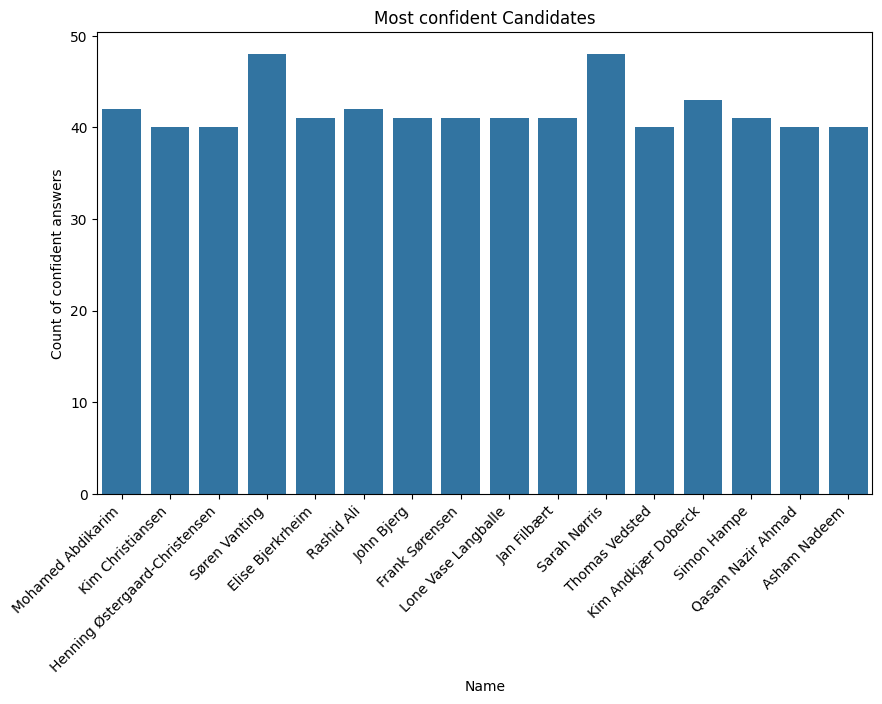

In [21]:
# Calculating the sum of the numbers -2 and 2 in each row
count_per_row = data_limited.isin([-2, 2]).sum(axis=1)

#Looking only at name and count
data_prepared = data_limited.copy()

#Adding a new row - "count"
data_prepared['count'] = count_per_row
selected_data = data_prepared[['navn', 'count']]

# Filtering out rows where 'count' is below 40
filtered_data = selected_data[selected_data['count'] >= 40]

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='navn', y='count', data=filtered_data)
plt.xticks(rotation=45, ha='right')
plt.title('Most confident Candidates')
plt.xlabel('Name')
plt.ylabel('Count of confident answers')
plt.show()

C:\Users\ninaw\AppData\Local\Temp\ipykernel_23064\1702215244.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_limited[questions] = party[questions].apply(pd.to_numeric, errors='coerce')


                                     530       531       533       534  \
navn                                                                     
Henning Østergaard-Christensen  1.229167  0.770833  1.770833  2.229167   
Palle Bjørn Rosenkilde          0.812500  1.187500  1.187500  2.187500   
Kristian Søndergaard Larsen     0.729167  0.729167  1.270833  2.270833   
Hanna-Maria Smed Molte Lyng     1.312500  0.687500  1.687500  0.687500   
Henrik Hjortshøj                0.708333  1.291667  2.291667  2.291667   
Birgit Jakobsen                 0.979167  1.020833  2.020833  2.020833   
Rolf Bjerre                     0.645833  0.645833  2.354167  0.645833   
Gunnar Bjørn Thomsen            1.729167  0.729167  0.729167  2.270833   
Tina Mørk                       1.770833  1.229167  1.229167  2.229167   
Jacob Bang                      1.895833  2.104167  1.104167  2.104167   
Jesper Housgaard                1.166667  2.166667  2.166667  2.166667   
Peter Scheining                 0.9166

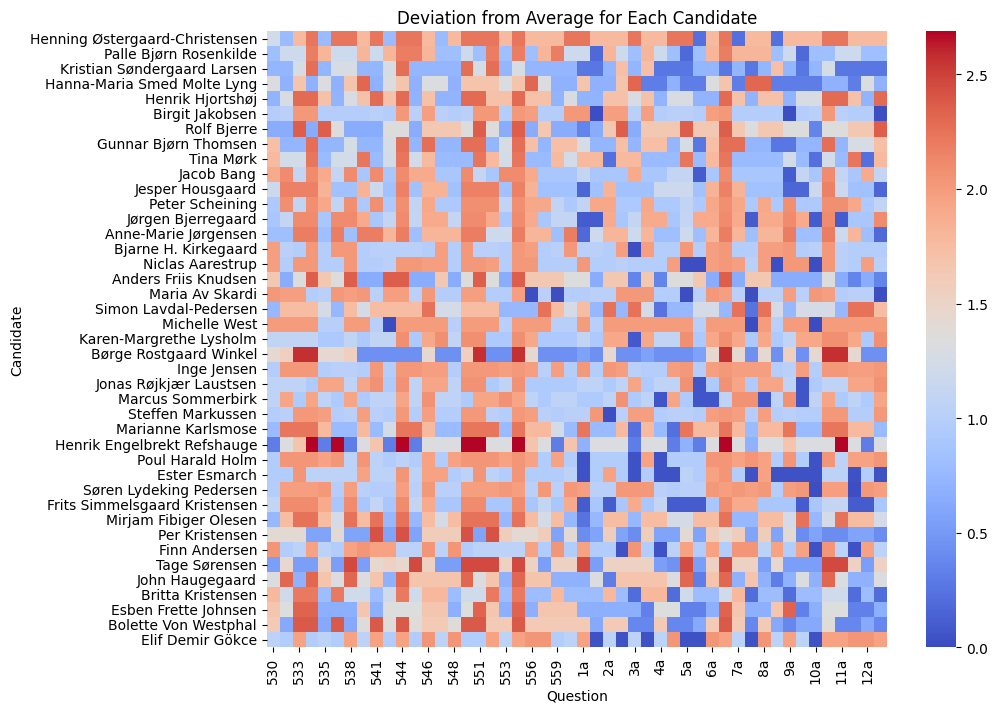

In [22]:
#Differences in responses between candidates, both inter-party and intra-party, along with an explanation of which parties have the most internal disagreements.
#Inter-Party:

#We sort members from one party
#For each question we find the average 
#Calculate diviation from average for each member of the party

party = data_filtered[data_filtered['parti'] == 'Kristendemokraterne']

# List of question columns
questions = [
    "530",
    "531",
    "533",
    "534",
    "535",
    "537",
    "538",
    "540",
    "541",
    "543",
    "544",
    "545",
    "546",
    "547",
    "548",
    "550",
    "551",
    "552",
    "553",
    "555",
    "556",
    "557",
    "559",
    "561",
    "1a",
    "1b",
    "2a",
    "2b",
    "3a",
    "3b",
    "4a",
    "4b",
    "5a",
    "5b",
    "6a",
    "6b",
    "7a",
    "7b",
    "8a",
    "8b",
    "9a",
    "9b",
    "10a",
    "10b",
    "11a",
    "11b",
    "12a",
    "12b"
]

# Ensure the data is numeric
data_limited[questions] = party[questions].apply(pd.to_numeric, errors='coerce')

# Calculate average for each question
averages = party[questions].mean(axis=1)

# Calculate deviation from average for each candidate
deviations = party[questions].sub(averages, axis=0)

# Take the absolute value of the deviations
deviations = deviations.abs()

# Add candidate names to the DataFrame
deviations['navn'] = party['navn']

# Set 'Name' as the index of the DataFrame
deviations.set_index('navn', inplace=True)

# Print the DataFrame
print(deviations)

limited_deviations = deviations

# Visualize the data using a bar plot
plt.figure(figsize=(10, 8))
sns.heatmap(limited_deviations, annot=False, cmap='coolwarm')
plt.title('Deviation from Average for Each Candidate')
plt.ylabel('Candidate')
plt.xlabel('Question')
plt.show()


                               530       531       533       534       535  \
navn                                                                         
Lars Philipsen Prahm      1.378378  1.696827  1.487662  0.869565  1.036428   
Karsten Hønge             1.621622  2.303173  0.512338  0.869565  1.963572   
Martin Kelleher-Petersen  1.621622  1.303173  1.512338  0.869565  0.036428   
Nicklas Gjedsig Larsen    1.621622  1.303173  1.512338  0.130435  0.036428   
Tom Gillesberg            0.621622  1.303173  1.512338  3.130435  2.963572   
...                            ...       ...       ...       ...       ...   
Maria Gudme               0.621622  1.303173  1.487662  0.869565  1.036428   
Maria Durhuus             0.621622  1.696827  1.512338  0.869565  0.036428   
Morten Bødskov            0.621622  1.303173  1.487662  0.869565  1.036428   
Jeppe Bruus               0.621622  0.696827  1.487662  0.869565  0.036428   
Gunvor Wibroe             0.621622  1.303173  0.512338  0.869565

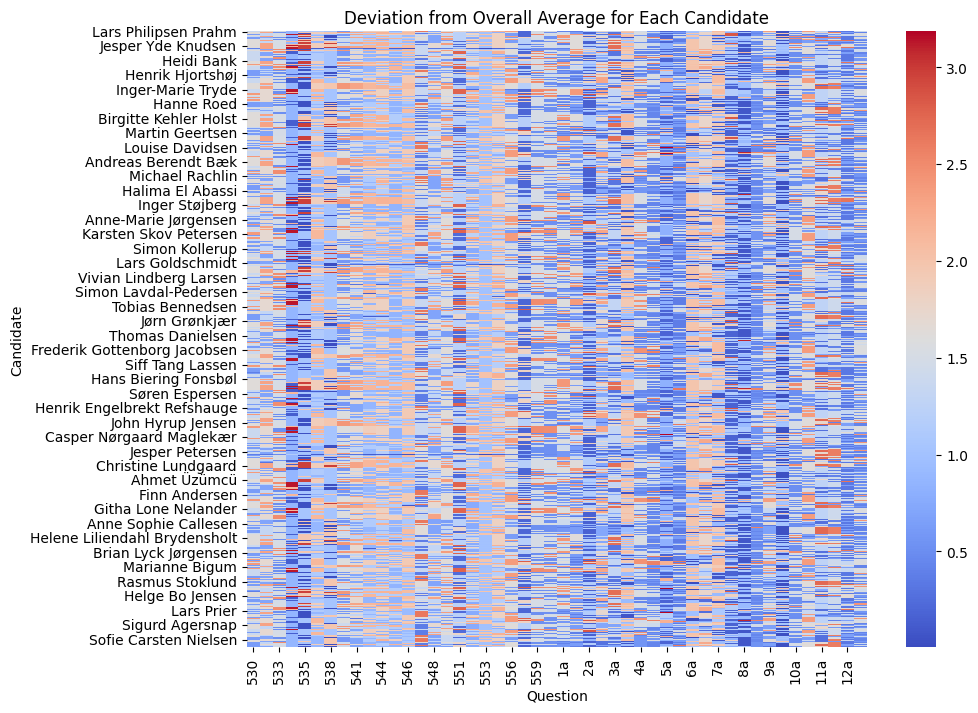

In [23]:
#Differences between all candidates (from all parties):

# Ensure the data is numeric
data_filtered[questions] = data_filtered[questions].apply(pd.to_numeric, errors='coerce')

# Calculate average for each question across all parties
overall_averages = data_filtered[questions].mean()

# Calculate deviation from overall average for each candidate
overall_deviations = data_filtered[questions].sub(overall_averages)

# Take the absolute value of the deviations
overall_deviations = overall_deviations.abs()

# Add candidate names to the DataFrame
overall_deviations['navn'] = data_filtered['navn']

# Set 'Name' as the index of the DataFrame
overall_deviations.set_index('navn', inplace=True)

# Print the DataFrame
print(overall_deviations)

# Visualize the data using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(overall_deviations, annot=False, cmap='coolwarm')
plt.title('Deviation from Overall Average for Each Candidate')
plt.ylabel('Candidate')
plt.xlabel('Question')
plt.show()

In [24]:
# We can see that there is a lot of blue on that chart which means most of the candidates responses do not
# differ much from the average.

                                             Average Deviation
Party                                                         
Moderaterne                                          33.752834
Socialistisk Folkeparti                              23.692502
Alternativet                                         34.381065
Løsgænger                                            53.111111
Enhedslisten                                         24.691926
Danmarksdemokraterne                                 20.726077
Venstre                                              30.814909
Frie Grønne, Danmarks Nye Venstrefløjsparti          23.792899
Dansk Folkeparti                                     33.118701
Kristendemokraterne                                  38.661511
Liberal Alliance                                     26.843858
Nye Borgerlige                                       16.752000
Det Konservative Folkeparti                          33.572657
Radikale Venstre                                     31

C:\Users\ninaw\AppData\Local\Temp\ipykernel_23064\1244787285.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  party[questions] = party[questions].apply(pd.to_numeric, errors='coerce')
C:\Users\ninaw\AppData\Local\Temp\ipykernel_23064\1244787285.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  party[questions] = party[questions].apply(pd.to_numeric, errors='coerce')
C:\Users\ninaw\AppData\Local\Temp\ipykernel_23064\1244787285.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

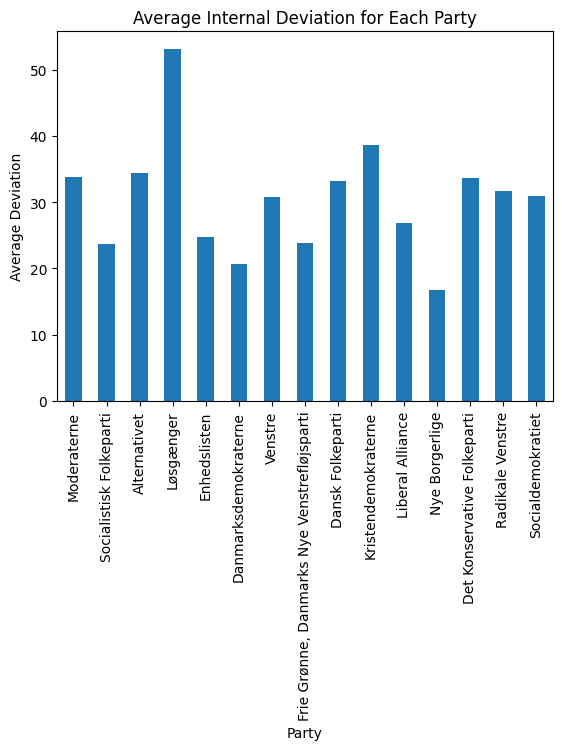

In [25]:
# Inter-party differences

# Get a list of unique parties
parties = data_filtered['parti'].unique()

# Initialize an empty DataFrame to store the average deviations for each party
party_deviations = pd.DataFrame()

# Loop through each party
for party_name in parties:
    # Filter data for the current party
    party = data_filtered[data_filtered['parti'] == party_name]
    
    # Ensure the data is numeric
    party[questions] = party[questions].apply(pd.to_numeric, errors='coerce')
    
    # Calculate average for each question
    averages = party[questions].mean()
    
    # Calculate deviation from average for each candidate
    deviations = party[questions].sub(averages)
    
    # Take the absolute value of the deviations
    deviations = deviations.abs()
    
    # Sum the deviations and divide by the number of people in the party (Finding the average deviation)
    average_deviation = deviations.sum().sum() / len(party)
    
    # Add to the party_deviations DataFrame (that has a Party and Average Deviation features)
    deviation_df = pd.DataFrame([{'Party': party_name, 'Average Deviation': average_deviation}])
    party_deviations = pd.concat([party_deviations, deviation_df], ignore_index=True)

# Set 'Party' as the index of the DataFrame
party_deviations.set_index('Party', inplace=True)

# Print the DataFrame
print(party_deviations)

# Visualize the data using a bar plot
party_deviations.plot(kind='bar', legend=False)
plt.title('Average Internal Deviation for Each Party')
plt.ylabel('Average Deviation')
plt.xlabel('Party')
plt.show()

In [26]:
# The people labeled Losgaernger have "the most internal disagreements" as they don't belong to any party.
# Out of the official parties - Kristendemokraterne have the most internal disagreement.
# This graph shows that the average diviation from the average answer to questions (within the party)

In [41]:
# Classification models to predict candidates' party affiliations. 
# Investigate if there are any candidates who seem to be in the "wrong" party based on their political landscape positions. 
# You must use the following three algorithms: 
# Decision Tree, Random Forrest, and Gradient Boosted Tree, and two other classification algorithms of your choice.

# We have a DataFrame named 'candidates_df' with features and target variable ('Party') where
# Features include numerical or preprocessed data related to candidates' political positions

# Sample data loading, replace it with your actual data
data_df = pd.read_excel("alldata.xlsx")

candidates_df = data_df[[
                    "parti",
                    "alder",
                    "530",
                    "531",
                    "533",
                    "534",
                    "535",
                    "537",
                    "538",
                    "540",
                    "541",
                    "543",
                    "544",
                    "545",
                    "546",
                    "547",
                    "548",
                    "550",
                    "551",
                    "552",
                    "553",
                    "555",
                    "556",
                    "557",
                    "559",
                    "561",
                     "1a",
                     "1b",
                     "2a",
                     "2b",
                     "3a",
                     "3b",
                     "4a",
                     "4b",
                     "5a",
                     "5b",
                     "6a",
                     "6b",
                     "7a",
                     "7b",
                     "8a",
                     "8b",
                     "9a",
                     "9b",
                     "10a",
                     "10b",
                     "11a",
                     "11b",
                     "12a",
                     "12b",]]

# Assuming 'Party' is the target variable and other columns are features
X = candidates_df.drop('parti', axis=1)
y = candidates_df['parti']

scaler = StandardScaler()  
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
#max_depth=None means nodes are expanded until all leaves are pure 
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=None, max_leaf_nodes=None, min_samples_split=2, criterion='gini')

#n_estimators=100 specifies the number of trees in the forest.
#max_features='sqrt' specifies that a random subset of features (square root of the total number of features) is considered at each split.
#bootstrap=True indicates that bootstrapping is used to create each tree's training data.
random_forest = RandomForestClassifier(n_estimators=100, max_features='sqrt', bootstrap=True, random_state=42)

#n_estimators: how many trees to train
#max_depth: How deep each tree should be (usually small for Boosted trees)
#learning_rate: How strongly does each tree learn from the previous one?
gradient_boosting = GradientBoostingClassifier(random_state=42, n_estimators=100, max_depth=2, learning_rate=0.1)


#Gaussian kernell, 
#C is a balance between underfitting and overfitting (the bigger C - the more it overfits)
# gamma - the higher gamma the more complex boudries. 'scale' is a default = 1.
svc = SVC(kernel='rbf', C=1, gamma='scale')  # Additional algorithm

#uses a defoult k-neighbours = 5
knn = KNeighborsClassifier()  # Additional algorithm

# Train classifiers
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)
svc.fit(X_train, y_train)
knn.fit(X_train, y_train)

# Make predictions
dt_predictions = decision_tree.predict(X_test)
rf_predictions = random_forest.predict(X_test)
gb_predictions = gradient_boosting.predict(X_test)
svc_predictions = svc.predict(X_test)
knn_predictions = knn.predict(X_test)

# Evaluate models
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_predictions))
print("SVC Accuracy:", accuracy_score(y_test, svc_predictions))
print("KNN Accuracy:", accuracy_score(y_test, knn_predictions))

# Investigate potential misalignments
misalignments_df = pd.DataFrame({
    'Actual': y_test,
    'DecisionTree': dt_predictions,
    'RandomForest': rf_predictions,
    'GradientBoosting': gb_predictions,
    'SVC': svc_predictions,
    'KNN': knn_predictions
})

# Adding candidate names
misalignments_df = misalignments_df.assign(Candidate=data_df["navn"])

#Returns rows only if one of the prediction models predict a party that's not an actual party
misalignments_df[misalignments_df['DecisionTree'] != misalignments_df['Actual']]
misalignments_df[misalignments_df['RandomForest'] != misalignments_df['Actual']]
misalignments_df[misalignments_df['GradientBoosting'] != misalignments_df['Actual']]
misalignments_df[misalignments_df['SVC'] != misalignments_df['Actual']]
misalignments_df[misalignments_df['KNN'] != misalignments_df['Actual']]

Decision Tree Accuracy: 0.7413793103448276
Random Forest Accuracy: 0.9367816091954023
Gradient Boosting Accuracy: 0.9022988505747126
SVC Accuracy: 0.9482758620689655
KNN Accuracy: 0.8793103448275862


,Actual,DecisionTree,RandomForest,GradientBoosting,SVC,KNN,Candidate
604,Alternativet,Socialistisk Folkeparti,Kristendemokraterne,Alternativet,Alternativet,Radikale Venstre,Jakob Schmidt
525,"Frie Grønne, Danmarks Nye Venstrefløjsparti",Alternativet,Alternativet,Alternativet,Alternativet,Enhedslisten,Marianne Karlberg
433,"Frie Grønne, Danmarks Nye Venstrefløjsparti",Enhedslisten,Enhedslisten,Enhedslisten,"Frie Grønne, Danmarks Nye Venstrefløjsparti",Enhedslisten,Rishi Balachandran
843,Det Konservative Folkeparti,Det Konservative Folkeparti,Det Konservative Folkeparti,Det Konservative Folkeparti,Det Konservative Folkeparti,Liberal Alliance,Rasmus Jarlov
499,Enhedslisten,Enhedslisten,Enhedslisten,Enhedslisten,Enhedslisten,Socialistisk Folkeparti,Marianne Mose
852,Radikale Venstre,Radikale Venstre,Radikale Venstre,Radikale Venstre,Kristendemokraterne,Kristendemokraterne,Abbas Razvi
352,Venstre,Det Konservative Folkeparti,Venstre,Liberal Alliance,Venstre,Liberal Alliance,Araz Khan
473,Det Konservative Folkeparti,Liberal Alliance,Liberal Alliance,Det Konservative Folkeparti,Liberal Alliance,Liberal Alliance,Ole Gade
63,Liberal Alliance,Det Konservative Folkeparti,Venstre,Venstre,Venstre,Venstre,Kurt Vind Christiansen
578,Det Konservative Folkeparti,Venstre,Det Konservative Folkeparti,Det Konservative Folkeparti,Det Konservative Folkeparti,Venstre,Steffen Peter Hansen


### Decision Trees
Key hyperparameters for decision trees include:

max_depth:
* Description: Maximum depth of the tree.
* Influence: Controls the maximum number of levels in the tree. Shallow trees (low max_depth) may underfit the data, while very deep trees (high max_depth) can overfit.

min_samples_split:
* Description: Minimum number of samples required to split an internal node.
* Influence: Higher values prevent the model from learning overly specific patterns, reducing overfitting. Lower values may result in overfitting.

min_samples_leaf:
* Description: Minimum number of samples required to be at a leaf node.
* Influence: Ensures that leaves contain at least a minimum number of observations, helping to smooth the model and reduce overfitting.

max_features:
* Description: Number of features to consider when looking for the best split.
* Influence: Controls how many features the model looks at before making a split. Using all features (max_features=None) can make the model more prone to overfitting. Using fewer features (max_features=sqrt or max_features=log2) can improve generalization.

criterion:
* Description: Function to measure the quality of a split (e.g., "gini" for Gini impurity or "entropy" for information gain).
* Influence: Determines how the quality of a split is calculated. Different criteria can lead to different splits and tree structures.

### Random Forests
Random forests have additional hyperparameters beyond those of individual decision trees:

n_estimators:
* Description: Number of trees in the forest.
* Influence: More trees generally improve performance and stability of predictions but increase computational cost.

bootstrap:
* Description: Whether bootstrap samples are used when building trees.
* Influence: Bootstrapping generally improves model robustness by reducing variance.

oob_score:
* Description: Whether to use out-of-bag samples to estimate the generalization error.
* Influence: Provides a built-in cross-validation mechanism to estimate model performance without needing separate validation data.

### Gradient Boosted Trees
Gradient-boosted trees also have unique hyperparameters:

learning_rate:
* Description: Shrinks the contribution of each tree by this factor.
* Influence: Lower values require more trees to achieve good performance but can lead to better generalization.

n_estimators:
* Description: Number of boosting stages to be run.
* Influence: More estimators can improve performance but also increase the risk of overfitting and computational cost.

subsample:
* Description: Fraction of samples to be used for fitting each base learner.
* Influence: Reduces variance and prevents overfitting. Typical values are between 0.5 and 1.0.

max_depth:
* Description: Maximum depth of the individual regression estimators.
* Influence: Controls the complexity of each individual tree. Shallower trees prevent overfitting but might underfit.

min_samples_split and min_samples_leaf:
* Description: Similar to decision trees, these control the minimum number of samples required for splits and leaf nodes.
* Influence: Adjusting these can help prevent overfitting and underfitting.

In [28]:
# Looking for candidates that should be in a different party - based on voting

#Only models
df = misalignments_df[[
    'DecisionTree',
    'RandomForest',
    'GradientBoosting',
    'SVC',
    'KNN',
]]

# Add a column for the count of the most common prediction
df['Most Common Count'] = df.apply(lambda row: row.value_counts().max(), axis=1)

# Add a column for the most common prediction
df['Most Common'] = df.mode(axis=1)[0]

# Adding candidate names
df = df.assign(Candidate=misalignments_df["Candidate"])

# Adding the party our candidates belong to
df = df.assign(Actual=misalignments_df["Actual"])

C:\Users\ninaw\AppData\Local\Temp\ipykernel_23064\1048847464.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Most Common Count'] = df.apply(lambda row: row.value_counts().max(), axis=1)


In [29]:

# Add a column to indicate if the candidate is in the wrong party
# Checking if the most common prediction is equal to the Actual, if yes:
# Checking if the count of the most common prediction is greater than 2, if yes:
# The candidate is in the "wrong party"
df['Wrong Party'] = (df['Most Common'] != df['Actual']) & (df['Most Common Count'] > 2)

# Create a new DataFrame with the required columns
wrong_party_df = df[df['Wrong Party']][['Candidate', 'Actual', 'Most Common', 'Most Common Count']]

# Rename the columns
wrong_party_df.columns = ['Candidate', 'Actual Party', 'Should Belong To', 'Most Common Count']

#Sorting from the highest count of model guesses
wrong_party_df = wrong_party_df.sort_values(by='Most Common Count', ascending=False)

# Print the DataFrame
print(wrong_party_df.head(5))

                  Candidate                                 Actual Party  \
525       Marianne Karlberg  Frie Grønne, Danmarks Nye Venstrefløjsparti   
433      Rishi Balachandran  Frie Grønne, Danmarks Nye Venstrefløjsparti   
139    Linea Søgaard-Lidell                                      Venstre   
473                Ole Gade                  Det Konservative Folkeparti   
63   Kurt Vind Christiansen                             Liberal Alliance   

                Should Belong To  Most Common Count  
525                 Alternativet                  4  
433                 Enhedslisten                  4  
139  Det Konservative Folkeparti                  4  
473             Liberal Alliance                  4  
63                       Venstre                  4  


In [30]:
# Our findings:

# Ole Gade is in Det Konservative Folkeparti party, however his answers indicate that she should belong to Liberal Alliance.
# 5 out of 5 models predicted that based on his answers he comes from Liberal Alliance.